## 6.5.3 PCR and PLS Regression

To run in Colab,
* click this button
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ssuai/machine_learning/blob/main/lab5-3_PCR_and_PLS.ipynb)
* run the following cell

In [ ]:
# clone the data folder
!git clone https://github.com/ssuai/machine_learning_data.git data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv('data/Hitters.csv')
df.head()

df.dropna(inplace=True)
len(df)

df.head()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [3]:
# prepare X (feature) and y (output)
X_num = df.select_dtypes('number').drop('Salary', axis=1)
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

X = pd.concat([X_num, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

y = df['Salary']

In [4]:
dummies

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Principal Components Regression

code adapted from https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import make_pipeline

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)

pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


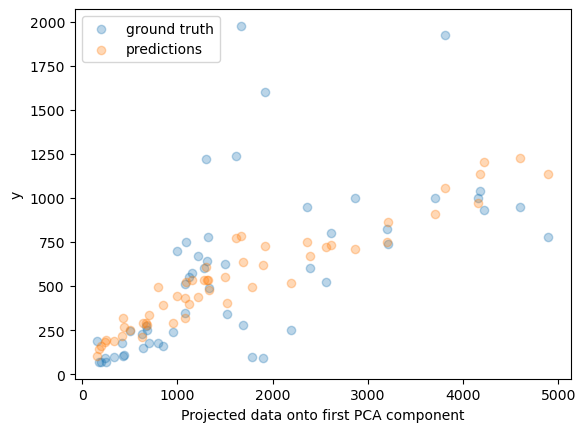

In [7]:
plt.scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
plt.scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
plt.xlabel("Projected data onto first PCA component")
plt.ylabel('y')
plt.legend()

In [8]:
# # Run cross-validation
# from sklearn.model_selection import cross_val_score
# cv_scores = cross_val_score(pcr, X, y, cv=5, scoring='neg_mean_squared_error')
# cv_scores = -cv_scores
# cv_scores.mean()

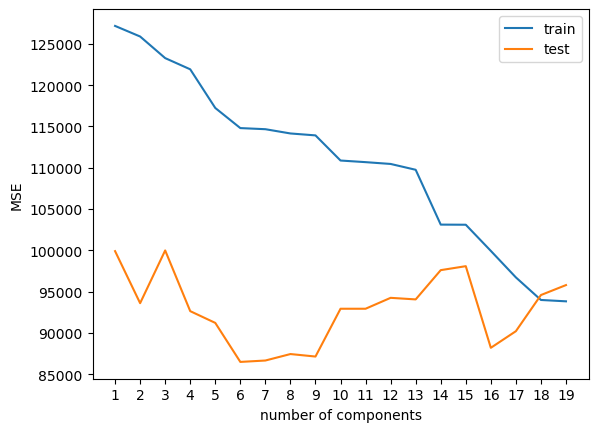

In [9]:
# add components
train_mse = []
test_mse = []
ns = list(range(1,20))
for n in ns:
    pcr = make_pipeline(StandardScaler(), PCA(n_components=n), LinearRegression())
    
    pcr.fit(X_train, y_train)
    
    train_mse.append(mean_squared_error(y_train, pcr.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, pcr.predict(X_test)))


plt.plot(ns, train_mse, label='train')
plt.plot(ns, test_mse, label='test')
plt.ylabel('MSE')
plt.xlabel('number of components')
plt.xticks(ns)
plt.legend()

In [10]:
# re-fit with 6 components
pcr = make_pipeline(StandardScaler(), PCA(n_components=6), LinearRegression())
pcr.fit(X_train, y_train)

mean_squared_error(y_test, pcr.predict(X_test))

86482.6444091867

## Partial Least Squares
https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html#sklearn.cross_decomposition.PLSRegression
scaler is already included and used by default

In [11]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

PLSRegression(n_components=1)

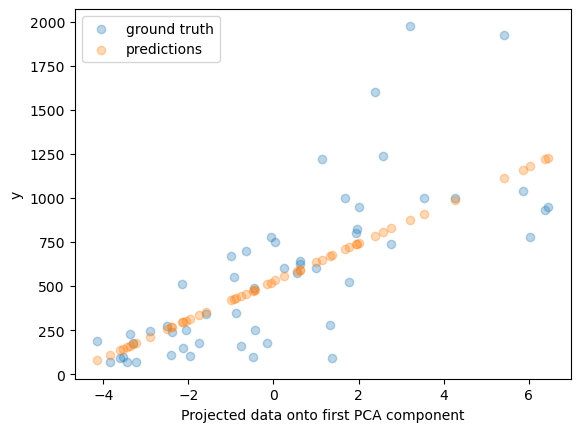

In [12]:
plt.scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
plt.scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
plt.xlabel("Projected data onto first PCA component")
plt.ylabel('y')
plt.legend()

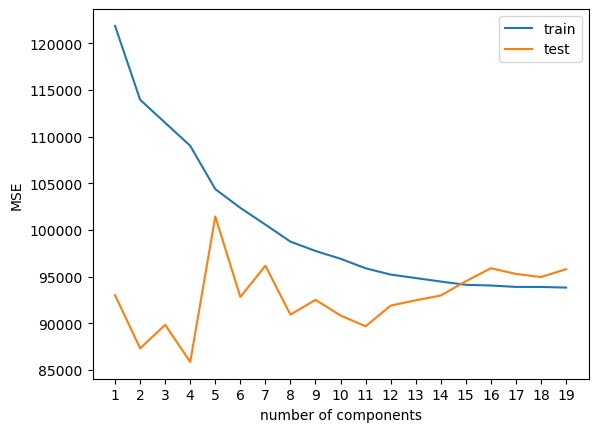

In [13]:
# add components
train_mse = []
test_mse = []
ns = list(range(1,20))
for n in ns:
    pls = PLSRegression(n_components=n)
    
    pls.fit(X_train, y_train)
    
    train_mse.append(mean_squared_error(y_train, pls.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, pls.predict(X_test)))

plt.plot(ns, train_mse, label='train')
plt.plot(ns, test_mse, label='test')
plt.ylabel('MSE')
plt.xlabel('number of components')
plt.xticks(ns)
plt.legend()

In [14]:
# re-fit with 4 components
pls = PLSRegression(n_components=4)
pls.fit(X_train, y_train)

mean_squared_error(y_test, pls.predict(X_test))

85857.72636488879